In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
df.drop(106,axis=0,inplace=True)

In [7]:
df.drop(105,axis=0,inplace=True)

In [8]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
df.columns=['Month','Sales per month' ]

In [10]:
df.head()

,Month,Sales per month
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [11]:
df['Month']=pd.to_datetime(df['Month'])

In [46]:
df.head()

,Month,Sales per month
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
df.set_index('Month',inplace=True)

In [48]:
df.head()

,Sales per month
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [18]:
from statsmodels.tsa.stattools import adfuller
# Store in a function for later use! 
def adf_check(time_series):
    
    result = adfuller(time_series) 
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels): 
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [19]:
adf_check(df['Sales per month'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.83359305633
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
p-value : 0.36391577166
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
#Lags Used : 11
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
df['Sales per Month First Difference'] = df['Sales per month'] - df['Sales per month'].shift(1)

In [23]:
adf_check(df['Sales per Month First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.18989644805
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
p-value : 2.51962044739e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
#Lags Used : 11
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
Number of Observations Used : 92
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


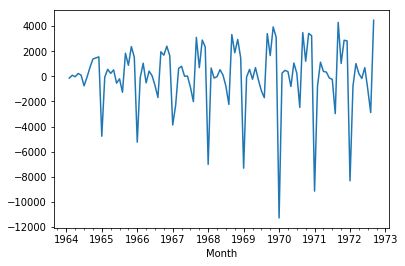

In [24]:
df['Sales per Month First Difference'].plot()

In [30]:
model=sm.tsa.statespace.SARIMAX(df['Sales per month'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


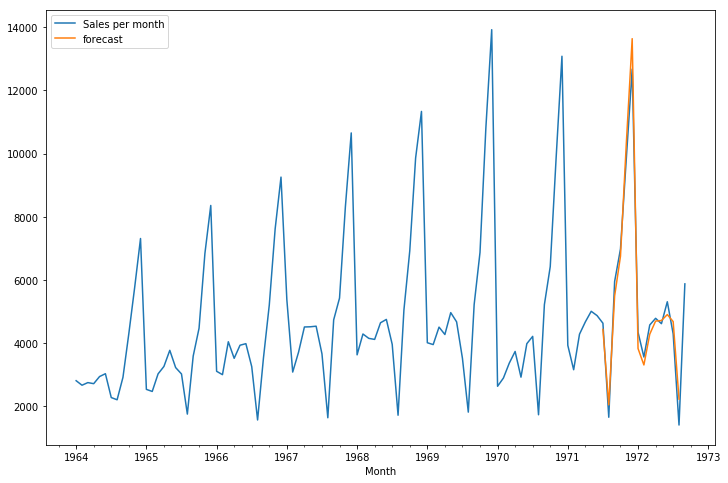

In [31]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales per month','forecast']].plot(figsize=(12,8))

In [34]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [35]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [36]:
future_datest_df.head()

,Sales per month,Sales per Month First Difference,forecast
1972-10-01,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN


In [37]:
future_df=pd.concat([df,future_datest_df])

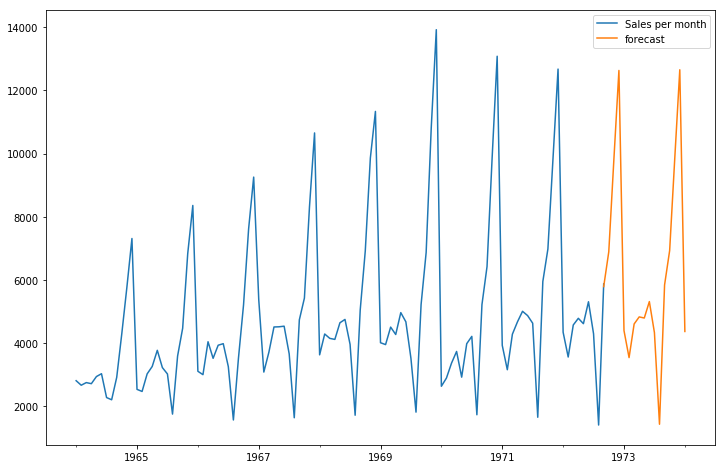

In [33]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales per month', 'forecast']].plot(figsize=(12, 8)) 